First and foremost, I imported all the packages I would need throughout this project.

In [120]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

My first step was simply to read in the csv file and make it into a data frame that I could manipulate

In [103]:
df = pd.read_csv("adult.data")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Basic Data Cleaning

After noticing that this csv file's first row wasn't column labels, I decided to label the columns myself for readability and funcitonality. After investigating the information on UCI's website, I found the appropriate name/label for each column and named the columns of my dataframe accordingly.

In [ ]:
df.columns = ["Age","Employment Sector", "Population Weight", "Education Level", "Education Number", "Marital Status", "Occupation", 
"Family Status", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours/Wk", "Native Country", "Income"]
df.head()

,Age,Employment Sector,Population Weight,Education Level,Education Number,Marital Status,Occupation,Family Status,Race,Sex,Capital Gain,Capital Loss,Hours/Wk,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The next bit of cleaning I did was to ensure that there weren't any Nan values in my dataset, nor were there any children since my analyses will be primarily focusing on income and anyone who shouldn't be reasonably expected to support themselves shouldn't be considered with the rest of the adult population that I'm trying to observe.

In [139]:
print(len(df))
df = df.dropna()
df = df[df["Age"]>=18]
print(len(df))
print(df["Age"].min())

32560
32165
18


One piece of EDA I like to start with is a correlation matrix to see if any of our quantitative data is correlated.

<Axes: >

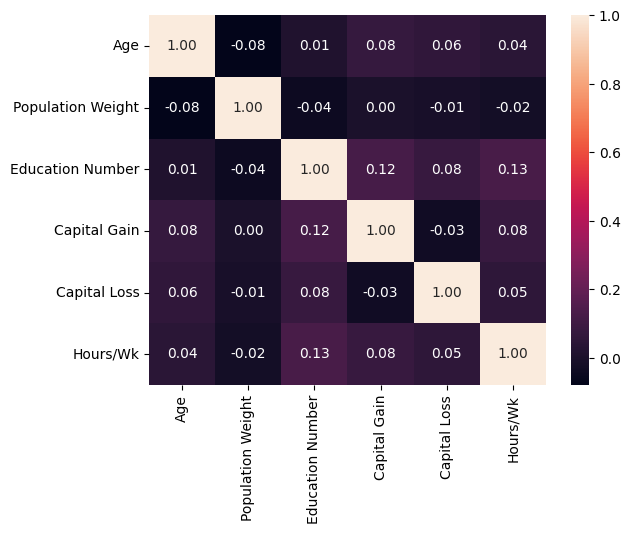

In [140]:
corr_df = df.select_dtypes(include="number") #Got a new dataframe with only quantitative data that I can use to make a correlation matrix
sns.heatmap(corr_df.corr(), annot=True, fmt = ".2f")

Seemingly, the only strong correlations are those that variables have with themselves (which is already implied). One thing I find surprising is that I was expecting a stronger negative correlation between capital gain and capital loss. This is because having capital gains typically implies you made money off of your investments and would not have capital losses. However, looking at this dataset, I see that most people have zero capital gains or losses. I find this surprising because investments are one of the easiest ways to keep your money safe while often allowing it to grow over time. If this dataset specified income level rather than categorizing it, I would love to run a linear regression on the data and see how predicted capital gains changes with one's income.

Since this heatmap suggests that this data set is likely lacking any variables that're related to each other, I'd like to investigate is how categorical variables such as Sex play into one's earnings. I'm expecting that not only will women be more predisposed to the lower income levels as they are often disadvantaged socioeconomically, but also that they're predisposed to lower levels of education. We can investigate both of these through the .groupby() function which creates weighted pivot tables (based on the population weight column) that we can generate weighted bar graphs with. At first I'll investigate sex's relationship to the income category, and then to education levels.

Finally, I'm expecting that these two visuals will illustrate the impact that education has on one's income and/or lifetime earnings. I'll at last generate a third bar plot that directly compares education level to income category.

In [141]:
weighted_sex_counts = df.groupby(["Sex", "Income"])["Population Weight"].sum()
weighted_sex_counts.head()

Sex     Income
Female  <=50K     1750386353
        >50K       216567452
Male    <=50K     2881402036
        >50K      1257579753
Name: Population Weight, dtype: int64

While the number of people in each sex/income category is unrealistic (i.e. there are not 1.78B Females in the U.S. making <=50K per year), they are indicative of the relative proportion of the population that each category falls under. To make my graph more readable, I will be turning each of these numbers into percentages of the sex's total population before plotting. For example, the percentage value stored in women making <=50K will be a percent of the whole female population.

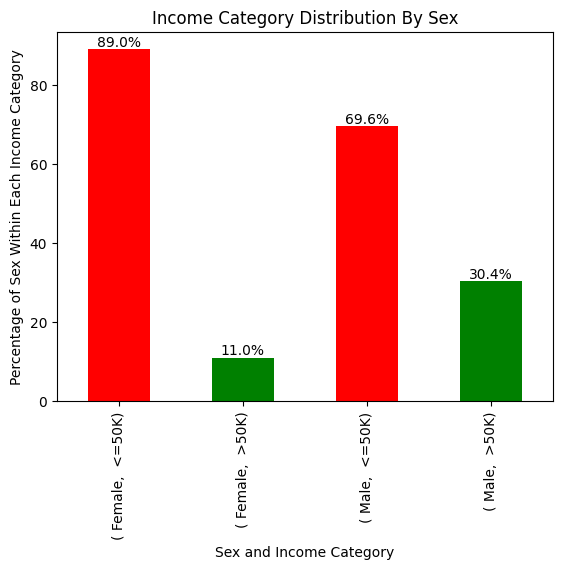

In [142]:
decimals = weighted_sex_counts/(weighted_sex_counts.groupby(level=0).sum())
percentages = decimals * 100.0
#made colors red for the lower income groups and green for the higher income groups
#used Aakanksha's hint to turn my PivotTable into a plot, where each bar is sorted by both variables
bar_graph = percentages.plot(kind = "bar", color = ["red","green"])
bar_graph.set_xlabel("Sex and Income Category")
bar_graph.set_ylabel("Percentage of Sex Within Each Income Category")
bar_graph.set_title("Income Category Distribution By Sex")

#Had help from ChatGPT on this last line, which helped me add labels to each bar and better quantify this visual
for container in bar_graph.containers:
    bar_graph.bar_label(container, fmt="%.1f%%")

From this, we can see that Women are experiencing financial hardships at a much higher rate, as 89.0% of women fall into this low income category compared to 69.6% of Men. This is an almost 20% difference across the population, implying that men are more predisposed to higher earnings than women. 

Next, I'll compare the population's education levels based on sex, again taking each row's population weight factor into account. 

Percentage of Each Sex (Men and Women) attaining each level of Education

In [143]:
df["Education Level"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

Initially when I graphed this visual, I found the graph to be almost impossible to read because there were 16 different education levels (see above) that had to represented on both the men's and women's side (for a total of 32). This made the bar graph quite tough to read/visualize so what I did to simplify this was first create a new column to map all of the education levels to that had more broad categories. For example, Anything first through eighth grade is considered "elementary", and anything after a bachelors degree is considered "graduate school."

In [144]:
df["Education Level"] = df["Education Level"].str.strip()
df["Education Category"] = df["Education Level"].copy()

The first steps (shown above) involved creating a new column with which I could map the original values of educaiton level into more broad categories. For my if statements (below) I had to strip the strings of any blank space on either side of them such that they would be equivalent to the strings that I compared them to.

In [145]:

"""
I decided to incorporate 12th into the 'Some High school' category because even if they did 
some school at the 12th grade level, this separate variable imples that they don't have their diploma.
"""
for index, row in df.iterrows():
    if row["Education Level"] =="1st-4th" or row["Education Level"] == "5th-6th" or row["Education Level"] == "7th-8th":
        df.loc[index, "Education Category"] = "Elementary School"
    elif row ["Education Level"] == "9th" or row["Education Level"] == "10th" or row["Education Level"] == "11th" or row["Education Level"] == "12th":
        df.loc[index,"Education Category"] = "Some High School"
    elif row["Education Level"] == "Prof-school" or row["Education Level"] == "Doctorate" or row["Education Level"] == "Masters":
        df.loc[index,"Education Category"] = "Grad School"
    #categorizing associate's degrees as separate from a bachelor's
    elif row["Education Level"] == "Assoc-voc" or row["Education Level"] == "Assoc-acdm":
        df.loc[index,"Education Category"] = "Two Year College"


Below, we can see that we're now working with a much more concise set of educaiton categories (7 as opposed to 16 for each gender).

In [146]:
df["Education Category"].unique()

array(['Bachelors', 'HS-grad', 'Some High School', 'Grad School',
       'Some-college', 'Two Year College', 'Elementary School',
       'Preschool'], dtype=object)

In [147]:
weighted_sex_edu_counts = df.groupby(["Sex", "Education Category"])["Population Weight"].sum()
weighted_sex_edu_counts

Sex     Education Category
Female  Bachelors              294847544
        Elementary School       56718493
        Grad School            126747465
        HS-grad                635217453
        Preschool                3183366
        Some High School       162288584
        Some-college           519184927
        Two Year College       168765973
Male    Bachelors              712114364
        Elementary School      181734497
        Grad School            367187039
        HS-grad               1353501981
        Preschool                8846992
        Some High School       370087749
        Some-college           856456057
        Two Year College       289053110
Name: Population Weight, dtype: int64

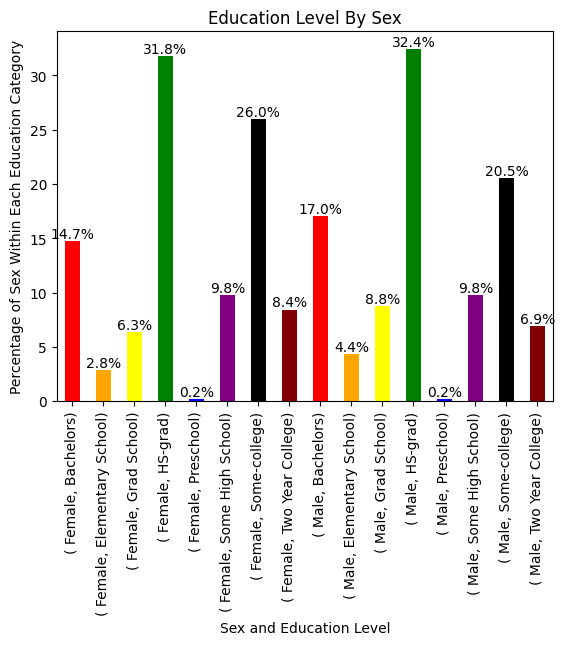

In [ ]:
edu_decimals = weighted_sex_edu_counts/(weighted_sex_edu_counts.groupby(level=0).sum())
edu_percentages = edu_decimals * 100.0
#made colors red for the lower income groups and green for the higher income groups
#used Aakanksha's hint to turn my grouped dataframe into a plot, where each bar is sorted by both variables
#colors will rotate such that each education category has its own color
edu_bar_graph = edu_percentages.plot(kind = "bar", color = ["Red", "Orange","Yellow","Green","Blue","Purple","Black","Maroon"])
edu_bar_graph.set_xlabel("Sex and Education Level")
edu_bar_graph.set_ylabel("Percentage of Sex Within Each Education Category")
edu_bar_graph.set_title("Education Level By Sex")

for container in edu_bar_graph.containers:
    edu_bar_graph.bar_label(container, fmt="%.1f%%")

While there's certainly a good amount to unpack with this bar plot, a few key things stand out. First off, males and females seemingly have similar High School graduation rates (HS Grad) and dropout rates (Some High School). However, a much smaller relative proportion of males end up dropping out of college (Some College) because about 20% of them completed "Some college" prior to dropping out compared to roughly 26% of women. Admittedly some of this rate could be accounted for by students in their late teens and early twenties, but this age group makes up only a small fraction of the dataset as a whole. A larger relative proportion of men either finished their Bachelor's Degrees or continued to some form of Grad School. Overall, while the vast majority of both sexes has at least finish high school, the two begin to separate when it comes to higher education, as men are overall slightly more likely to earn at least one additional degree (32.7% vs 29.4% comparing Assoc, Bachelor's and Grad School degrees).

Next, ignoring gender, I'm curious to see how these higher academic achievements have affected the earnings and stability of one's earnings. My inference is that since the higher paying jobs are typically those requiring either a Bachelor's or advanced degree, Those who've completed some form of college education will outearn their peers in the HS-Grad and below demographics.

Percentage of each Education Category within each Earning Category

In [148]:
weighted_edu_counts = df.groupby(["Education Category", "Income"])["Population Weight"].sum()
weighted_edu_counts

Education Category  Income
Bachelors           <=50K      585115776
                    >50K       421846132
Elementary School   <=50K      227371988
                    >50K        11081002
Grad School         <=50K      183568743
                    >50K       310365761
HS-grad             <=50K     1678863134
                    >50K       309856300
Preschool           <=50K       12030358
Some High School    <=50K      498564069
                    >50K        33812264
Some-college        <=50K     1104973521
                    >50K       270667463
Two Year College    <=50K      341300800
                    >50K       116518283
Name: Population Weight, dtype: int64

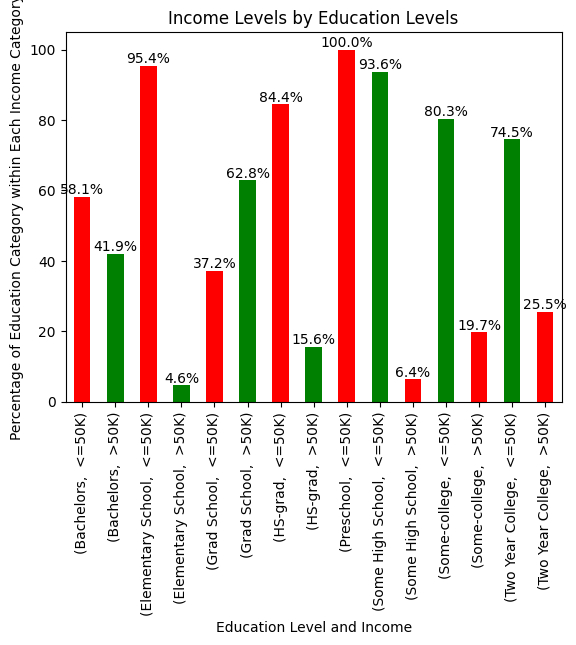

In [ ]:
edu_floats = weighted_edu_counts/(weighted_edu_counts.groupby(level=0).sum())
edu_percents = edu_floats * 100.0
#made colors red for the lower income groups and green for the higher income groups
#used Aakanksha's hint to turn my grouped dataframe into a plot, where each bar is sorted by both variables
edu_bar_graph = edu_percents.plot(kind = "bar", color = ["Red", "Green"])
edu_bar_graph.set_xlabel("Education Level and Income")
edu_bar_graph.set_ylabel("Percentage of Education Category within Each Income Category")
edu_bar_graph.set_title("Income Levels by Education Levels")

for container in edu_bar_graph.containers:
    edu_bar_graph.bar_label(container, fmt="%.1f%%")

This graph illustrates that generally speaking, your earning potential rises with your education level. The lowest education levels, pre-school and elementary, produce the highest rates of low income (though this makes sense as many people at this low of an education level are likely children rather than adults who dropped out). From here, we see that only 15.6% of people who stopped school after high school earn >50K; but this number rises 19.7% for those who went to college and dropped out. It continues to grow to 25.5% at two-year colleges before exploding to 41.9% and 62.8% respectively for Bachelor's and Graduate Degree holders. Overall, we see that incomes grow at an increasing rate the more school people complete after high school. 

Concluding Remarks

Overall, my most definitive finding was surely my last one, as the proportion of graduates making over 50K continually rises with each higher level of education. Areas I'd like to further explore with this data set in the future would thus be how educated different demographics of the population are beyond just sex. This would be done in a similar manner by grouping the total population weight of different races to illustrate education's role in economic inequality or even by grouping native countries to approximate each country's economic development. 

Education level by sex was also insightful, as it seemed like men and women had quite similar rates of education up until high school. After this point, men separated themselves by a few percentage points in earning higher degrees. However, this 3-4% difference in populations earning college degrees is not nearly enough to explain the approximately 20% difference in earning categories that we found through the first bar chart. This implies that while education is certainly an important step towards a good career, there are larger socioeconomic advantages/disadvantages faced by certain demographics that education levels can't fully explain.